In [47]:
import pandas as pd
import plotnine as pn

In [48]:
house_data_clean = pd.read_csv('./data/house-price-data.csv', index_col='Id')
house_data_clean

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [49]:
house_data = house_data_clean.copy()

# house_data["LotArea"] = house_data["LotArea"] // 1_000
# house_data['LotAreaNormalized'] = house_data['LotArea'].where(house_data['LotArea'] < 50, 50)

feature_to_check = "OverallQual"

In [50]:
# house_data["LotFrontage"] = house_data["LotFrontage"].clip(0, 100)
# house_data["LotFrontage"] = house_data["LotFrontage"] // 10 * 10

In [51]:
# house_data["Functional"] = house_data["Functional"].where(house_data["Functional"] == "Typ", "Deduction")
# house_data

In [52]:
# house_data["UsefulArea"] = house_data["TotalBsmtSF"] + house_data["1stFlrSF"] + house_data["2ndFlrSF"] + house_data[
#     "GarageArea"]
# house_data["UsefulArea"] = house_data["UsefulArea"].clip(1_000, 5_000)
# house_data["UsefulArea"] = house_data["UsefulArea"] // 100 * 100
# house_data

In [53]:
house_data[[feature_to_check, 'SalePrice']].corr()

,OverallQual,SalePrice
OverallQual,1.000000,0.790982
SalePrice,0.790982,1.000000


In [54]:
# house_data["LotArea"] = house_data["LotArea"].where(house_data["LotArea"] < 20_000, 20_000)
# house_data["LotArea"] = house_data["LotArea"] // 1_000 

In [55]:
# house_data = house_data[
#     house_data["SaleCondition"] == "Normal"
#     ]

In [56]:
house_data_count = house_data.value_counts(feature_to_check).reset_index()
house_data_count

,OverallQual,count
0,5,397
1,6,374
2,7,319
3,8,168
4,4,116
5,9,43
6,3,20
7,10,18
8,2,3
9,1,2


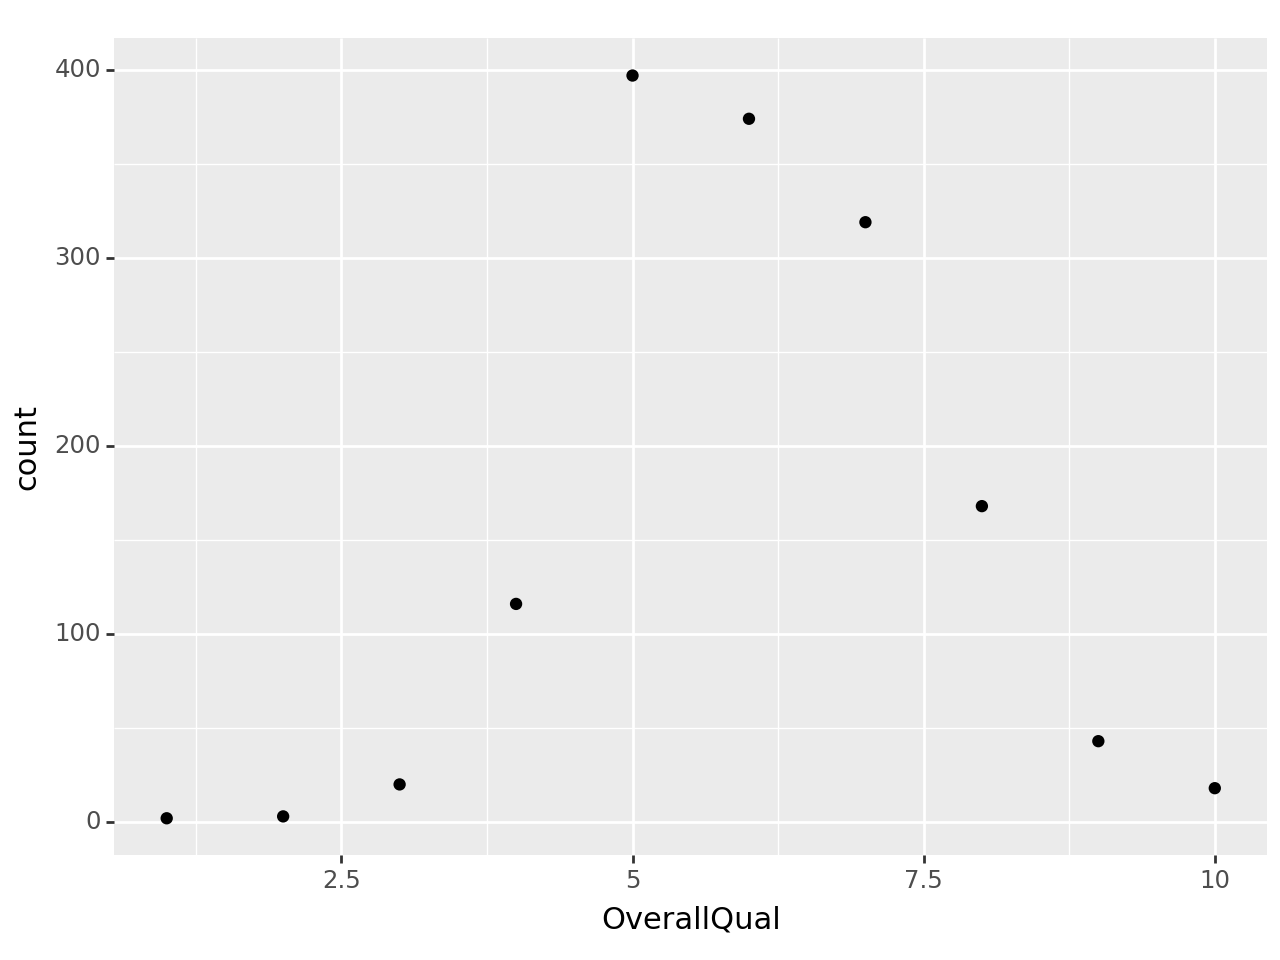

In [57]:
graph = (
        pn.ggplot(
            house_data_count,
            pn.aes(x=feature_to_check, y="count"),
        )
        + pn.geom_point()
)

graph.draw()

In [58]:
house_data_group_price = house_data.groupby(feature_to_check)["SalePrice"].mean().reset_index()
house_data_group_price

,OverallQual,SalePrice
0,1,50150.000000
1,2,51770.333333
2,3,87473.750000
3,4,108420.655172
4,5,133523.347607
5,6,161603.034759
6,7,207716.423197
7,8,274735.535714
8,9,367513.023256
9,10,438588.388889


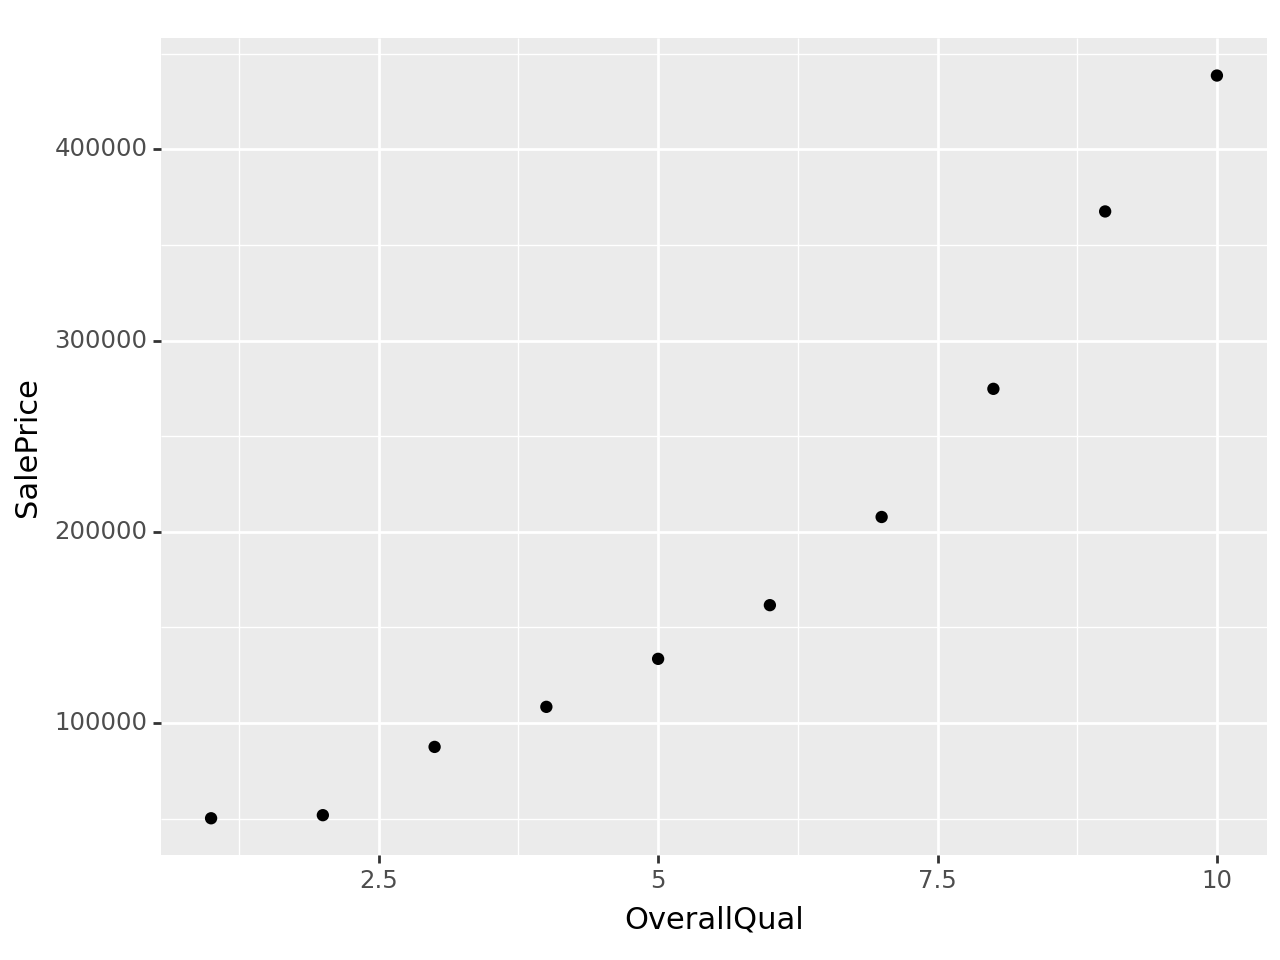

In [59]:
graph = (
        pn.ggplot(
            house_data_group_price,
            pn.aes(x=feature_to_check, y="SalePrice"),
        )
        + pn.geom_point()
)

graph.draw()

RANDOM STUFF

In [60]:
house_data_neighborhood = house_data.groupby('Neighborhood').agg(
    {"LotArea": ["mean"], "SalePrice": ["mean"]}).reset_index()
house_data_neighborhood = house_data_neighborhood.sort_values(by=('LotArea', 'mean'))
house_data_neighborhood

,Neighborhood,LotArea,SalePrice
,,mean,mean
1,Blueste,1625.000000,137500.000000
2,BrDale,1801.000000,104493.750000
10,MeadowV,2324.000000,98576.470588
13,NPkVill,3267.444444,142694.444444
0,Blmngtn,3398.176471,194870.882353
3,BrkSide,7360.413793,124834.051724
21,Somerst,7840.872093,225379.837209
9,IDOTRR,8109.162162,100123.783784
18,SWISU,8127.560000,142591.360000


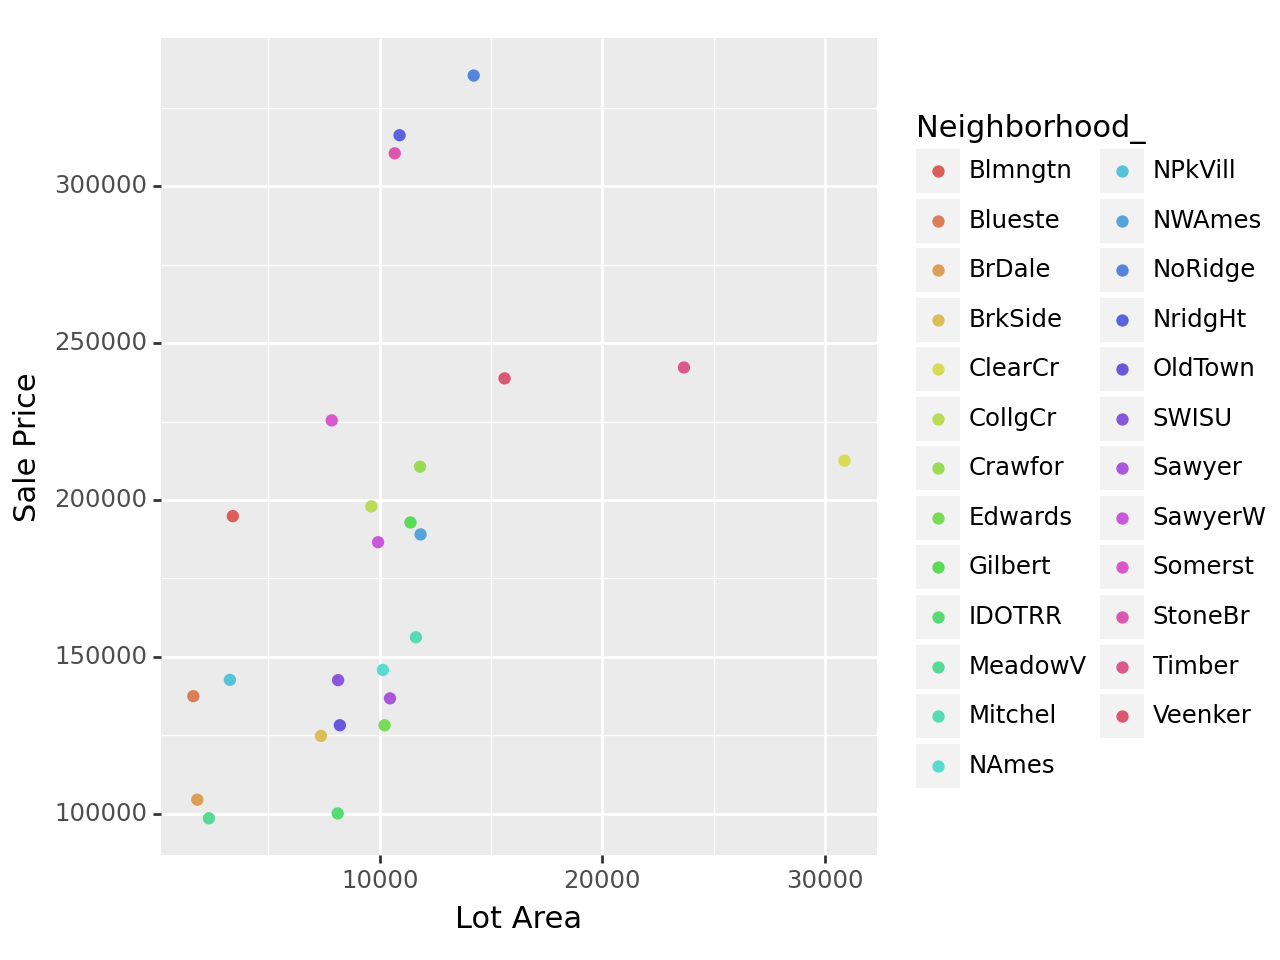

In [61]:
house_data_neighborhood.columns = ['_'.join(col) for col in house_data_neighborhood.columns]

graph = (
        pn.ggplot(house_data_neighborhood) +
        pn.aes(x='LotArea_mean', y='SalePrice_mean', color='Neighborhood_') +
        pn.geom_point() +
        pn.labs(x='Lot Area', y='Sale Price')
)

graph.draw()